## Picogreen Concentration vs. User

##### Updated CSV 3/22/2018 & Date: 9/01/2017 - 2/16/2018

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

sns.set_style('whitegrid')
sns.set_context('notebook')

In [2]:
df = pd.read_csv('patch_seq_log_mouse.csv')

In [3]:
list_initial = ['Date', 
                'User', 
                'Rig #', 
                'Picogreen conc. (pg/uL)', 
                'PCR cycles', 
                'SM_QC_PF', 
                'Bad dates']
df = df[list_initial]
df.head()

,Date,User,Rig #,Picogreen conc. (pg/uL),PCR cycles,SM_QC_PF,Bad dates
0,170104,P1,5,NaN,18.0,pass,x
1,170104,P1,5,NaN,18.0,pass,x
2,170104,P1,5,NaN,18.0,pass,x
3,170104,P1,5,NaN,18.0,pass,x
4,170104,P1,5,NaN,18.0,pass,x


### Categorizing & Filtering the columns

In [4]:
#Changing Date Format
df['Date'] = pd.to_datetime(df['Date'], format = '%y%m%d', errors = 'coerce')

#Changing String to Numerical
df['Picogreen conc. (pg/uL)'] = pd.to_numeric(df['Picogreen conc. (pg/uL)'].str.replace(' ',''), errors ='coerce')

#Categories
df['User'] = df['User'].astype('category')
df['Rig #'] = df['Rig #'].astype('category')
df['PCR cycles'] = df['PCR cycles'].astype('category')
df['SM_QC_PF'] = df['SM_QC_PF'].astype('category')
df['Bad dates'] = df['Bad dates'].astype('category')

#Filtering Columns
df = df[df['PCR cycles'] == 21]      #Shows 21 pcr cycles
df = df[df['SM_QC_PF'] != 'cnt']     #Shows everything except (cnt = control)
df = df[df['Bad dates'] != 'x']      #Shows everthing except (x = contaminated)

#Dropping blank columns
df = df.drop('Bad dates', 1)
df.dropna(subset = ['User', 'Picogreen conc. (pg/uL)', 'SM_QC_PF'], inplace = True)

In [5]:
df.head()

,Date,User,Rig #,Picogreen conc. (pg/uL),PCR cycles,SM_QC_PF
1634,2017-04-19,P2,6,71.0,21.0,fail
1635,2017-04-19,P2,6,608.0,21.0,pass
1636,2017-04-19,P2,6,6.0,21.0,fail
1637,2017-04-19,P2,6,1536.0,21.0,pass
1638,2017-04-19,P2,6,582.0,21.0,pass


##### Split dataframe at start of production date (9/01/2017) 

In [6]:
df1 = df.loc[3792:] 

In [7]:
df1.head()

,Date,User,Rig #,Picogreen conc. (pg/uL),PCR cycles,SM_QC_PF
3792,2017-09-01,P2,7,659.0,21.0,pass
3793,2017-09-01,P2,7,528.0,21.0,pass
3794,2017-09-01,P2,7,1415.0,21.0,pass
3795,2017-09-01,P2,7,743.0,21.0,pass
3798,2017-09-01,P8,6,567.0,21.0,pass


In [8]:
df1.tail()

,Date,User,Rig #,Picogreen conc. (pg/uL),PCR cycles,SM_QC_PF
5395,2018-02-16,P8,6,1213.934056,21.0,pass
5396,2018-02-16,P1,2,211.537044,21.0,fail
5397,2018-02-16,P1,2,551.218520,21.0,pass
5398,2018-02-16,P1,2,387.009938,21.0,fail
5399,2018-02-16,P1,2,1621.078414,21.0,pass


## Info

In [9]:
df1.User.value_counts()

P8    441
P9    353
P2    263
PB    233
PA    184
P1     45
P6     32
P5      0
P3      0
P0      0
Name: User, dtype: int64

### Boxplot of Picogreen Concentration vs User

In [10]:
#Users = P1(Kristen), P2(Rusty), P8(Lindsay), P9(Lisa), PA(Ram), PB(Dijon)
#Restricted yield below 15000 (3 large outliers: 69000 & 16000, 11000)

Text(0,0.5,'Picogreen Concentration (pg/uL)')

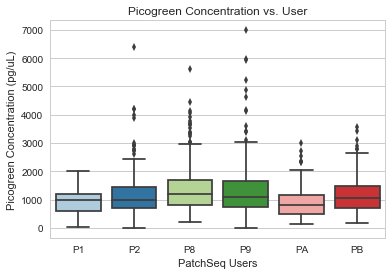

In [11]:
sns.boxplot(x = 'User', y = 'Picogreen conc. (pg/uL)',
            data = df1[df1['Picogreen conc. (pg/uL)'] < 10000], 
            order = ['P1', 'P2', 'P8', 'P9', 'PA', 'PB'], 
            palette = 'Paired').set_title('Picogreen Concentration vs. User')
plt.xlabel('PatchSeq Users')
plt.ylabel('Picogreen Concentration (pg/uL)')
#plt.savefig("box_picogreen_conc_vs_user")

### Box Plot with outliers included

Text(0,0.5,'Picogreen Concentration (pg/uL)')

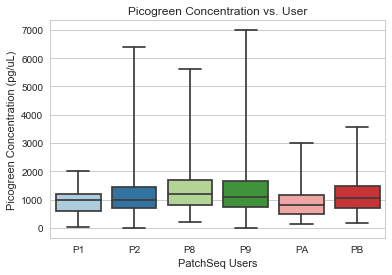

In [12]:
#whis = np.inf includes the outliers
sns.boxplot(x = 'User', y = 'Picogreen conc. (pg/uL)',
            data = df1[df1['Picogreen conc. (pg/uL)'] < 10000], 
            order = ['P1', 'P2', 'P8', 'P9', 'PA', 'PB'],
            palette = 'Paired', whis = np.inf).set_title("Picogreen Concentration vs. User")
plt.xlabel('PatchSeq Users')
plt.ylabel('Picogreen Concentration (pg/uL)')

### Extras

In [13]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

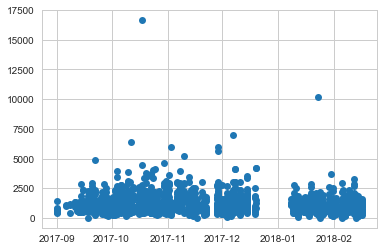

In [14]:
plt.plot_date(df1['Date'], df1['Picogreen conc. (pg/uL)']) 

In [15]:
fil_df1 = df1[df1['User'] == 'P1']
fil_df2 = df1[df1['User'] == 'P2']
fil_df8 = df1[df1['User'] == 'P8']
fil_df9 = df1[df1['User'] == 'P9']
fil_dfA = df1[df1['User'] == 'PA']
fil_dfB = df1[df1['User'] == 'PB']

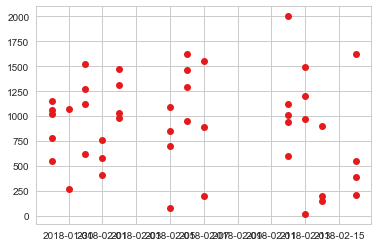

In [16]:
plt.plot_date(fil_df1['Date'], fil_df1['Picogreen conc. (pg/uL)'], color = '#e41a1c') 

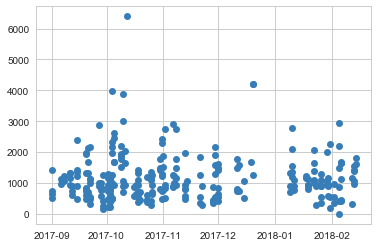

In [17]:
plt.plot_date(fil_df2['Date'], fil_df2['Picogreen conc. (pg/uL)'], color = '#377eb8') 

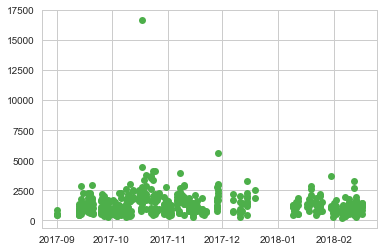

In [18]:
plt.plot_date(fil_df8['Date'], fil_df8['Picogreen conc. (pg/uL)'], color = '#4daf4a') 

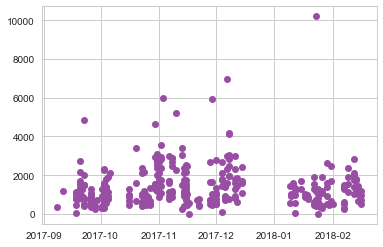

In [19]:
plt.plot_date(fil_df9['Date'], fil_df9['Picogreen conc. (pg/uL)'], color = '#984ea3') 

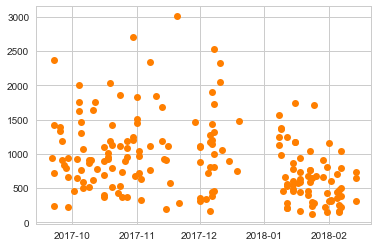

In [20]:
plt.plot_date(fil_dfA['Date'], fil_dfA['Picogreen conc. (pg/uL)'], color = '#ff7f00') 

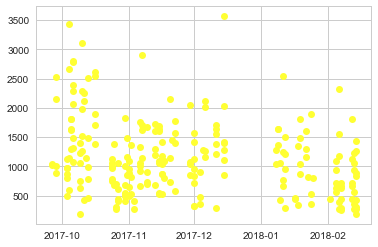

In [21]:
plt.plot_date(fil_dfB['Date'], fil_dfB['Picogreen conc. (pg/uL)'], color = '#ffff33') 

KeyError: 'P6'

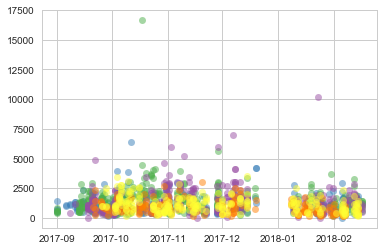

In [22]:
colors = {'P1' : '#e41a1c',
         'P2' : '#377eb8',
         'P8' : '#4daf4a',
         'P9' : '#984ea3',
         'PA' : '#ff7f00',
         'PB' : '#ffff33'}

for user in df1['User'].unique():
    plt.plot_date(df1[df1['User'] == user]['Date'], df1[df1['User'] == user]['Picogreen conc. (pg/uL)'],
                  label = user, alpha = .5, color = colors[user])
plt.ylabel('Picogreen Conc. (pg/uL)')
plt.xticks(rotation = 20)
plt.legend()